# Part I

Kaggle: https://www.kaggle.com/competitions/predict-who-is-more-influential-in-a-social-network/overview \
Existing solution: https://www.kaggle.com/code/hunglq/tw-influencers-prediction \
Other solutions: https://www.kaggle.com/c/predict-who-is-more-influential-in-a-social-network/notebooks

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

font = {'family' : 'Optima',
        'weight' : 'regular',
        'size'   : 16}
plt.rc('font', **font)
plt.rc('xtick', labelsize=15)     # tick labels bigger
plt.rc('ytick', labelsize=15)     # tick labels bigger
plt.rc('savefig', dpi=300)       # higher res outputs

## Load dataset into the DataFrame

In [75]:
df = pd.read_csv('train.csv')

### Check the types

In [76]:
df.dtypes

Choice                   int64
A_follower_count         int64
A_following_count        int64
A_listed_count           int64
A_mentions_received    float64
A_retweets_received    float64
A_mentions_sent        float64
A_retweets_sent        float64
A_posts                float64
A_network_feature_1      int64
A_network_feature_2    float64
A_network_feature_3    float64
B_follower_count         int64
B_following_count        int64
B_listed_count           int64
B_mentions_received    float64
B_retweets_received    float64
B_mentions_sent        float64
B_retweets_sent        float64
B_posts                float64
B_network_feature_1      int64
B_network_feature_2    float64
B_network_feature_3    float64
dtype: object

### Check the dimensions

In [77]:
df.shape

(5500, 23)

### Check the column names

In [78]:
df.columns

Index(['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3'],
      dtype='object')

## Data Exploration

### Provide descriptive statistics

In [79]:
df.describe()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,A_network_feature_3,B_follower_count,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
count,5500.000000,5.500000e+03,5.500000e+03,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5.500000e+03,5500.000000,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000
mean,0.509455,6.498840e+05,1.265895e+04,5952.453273,2.666032e+03,1032.371839,6.011873,1.109924,9.090730,5267.768000,84.805209,3747.219758,6.854869e+05,12738.259818,5903.148364,2.554598e+03,997.149954,6.099658,1.106236,9.505821,5254.933636,85.024196,3745.175480
std,0.499956,2.028787e+06,4.900867e+04,17339.141191,2.916543e+04,10954.953223,9.519797,1.910104,18.311060,28946.777345,104.073204,5757.339852,2.160612e+06,50054.520874,16298.462018,2.508873e+04,9342.006880,9.729557,1.939914,19.424680,26778.820125,106.689384,5518.399590
min,0.000000,1.600000e+01,0.000000e+00,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,0.000000,0.000000,2.000000e+01,0.000000,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,0.000000,0.000000
25%,0.000000,2.663750e+03,3.220000e+02,85.000000,3.453649e+00,0.716816,0.359534,0.100503,0.632440,12.000000,14.991870,1180.805341,2.498250e+03,322.000000,75.000000,3.260473e+00,0.714556,0.356943,0.100503,0.822584,11.000000,15.176568,1206.500000
50%,1.000000,4.558900e+04,7.780000e+02,932.000000,4.876542e+01,14.029113,2.299666,0.341936,3.555194,195.000000,54.925234,2206.420734,4.402700e+04,773.000000,890.000000,4.876542e+01,14.029113,2.251398,0.341936,3.342999,190.000000,54.925234,2206.420734
75%,1.000000,3.927380e+05,2.838000e+03,6734.000000,3.498196e+02,118.704407,7.198330,1.320681,10.691878,1323.000000,109.695652,4390.379310,3.701142e+05,2838.000000,6734.000000,3.743699e+02,107.081021,6.866840,1.320681,10.600502,1323.000000,112.191489,4349.908608
max,1.000000,3.654319e+07,1.165830e+06,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,1121.000000,144651.461538,3.654319e+07,664324.000000,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,1861.583333,75526.083333


## Dealing with missing values

### Check missing values

In [80]:
def missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
    print("Dataframe has " + str(df.shape[1]) + " columns.")
    print("There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    return mis_val_table_ren_columns

In [81]:
# Missing values statistics
miss_values = missing_values(df)
miss_values.head(20)

Dataframe has 23 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


### Data duplicates

In [82]:
df.duplicated().sum()

132

In [83]:
df = df.drop_duplicates()
df.shape

(5368, 23)

## Target

### Check distinct values in choice

In [84]:
df['Choice'].unique()

array([0, 1])

## Data Exploration

### Histograms

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_su

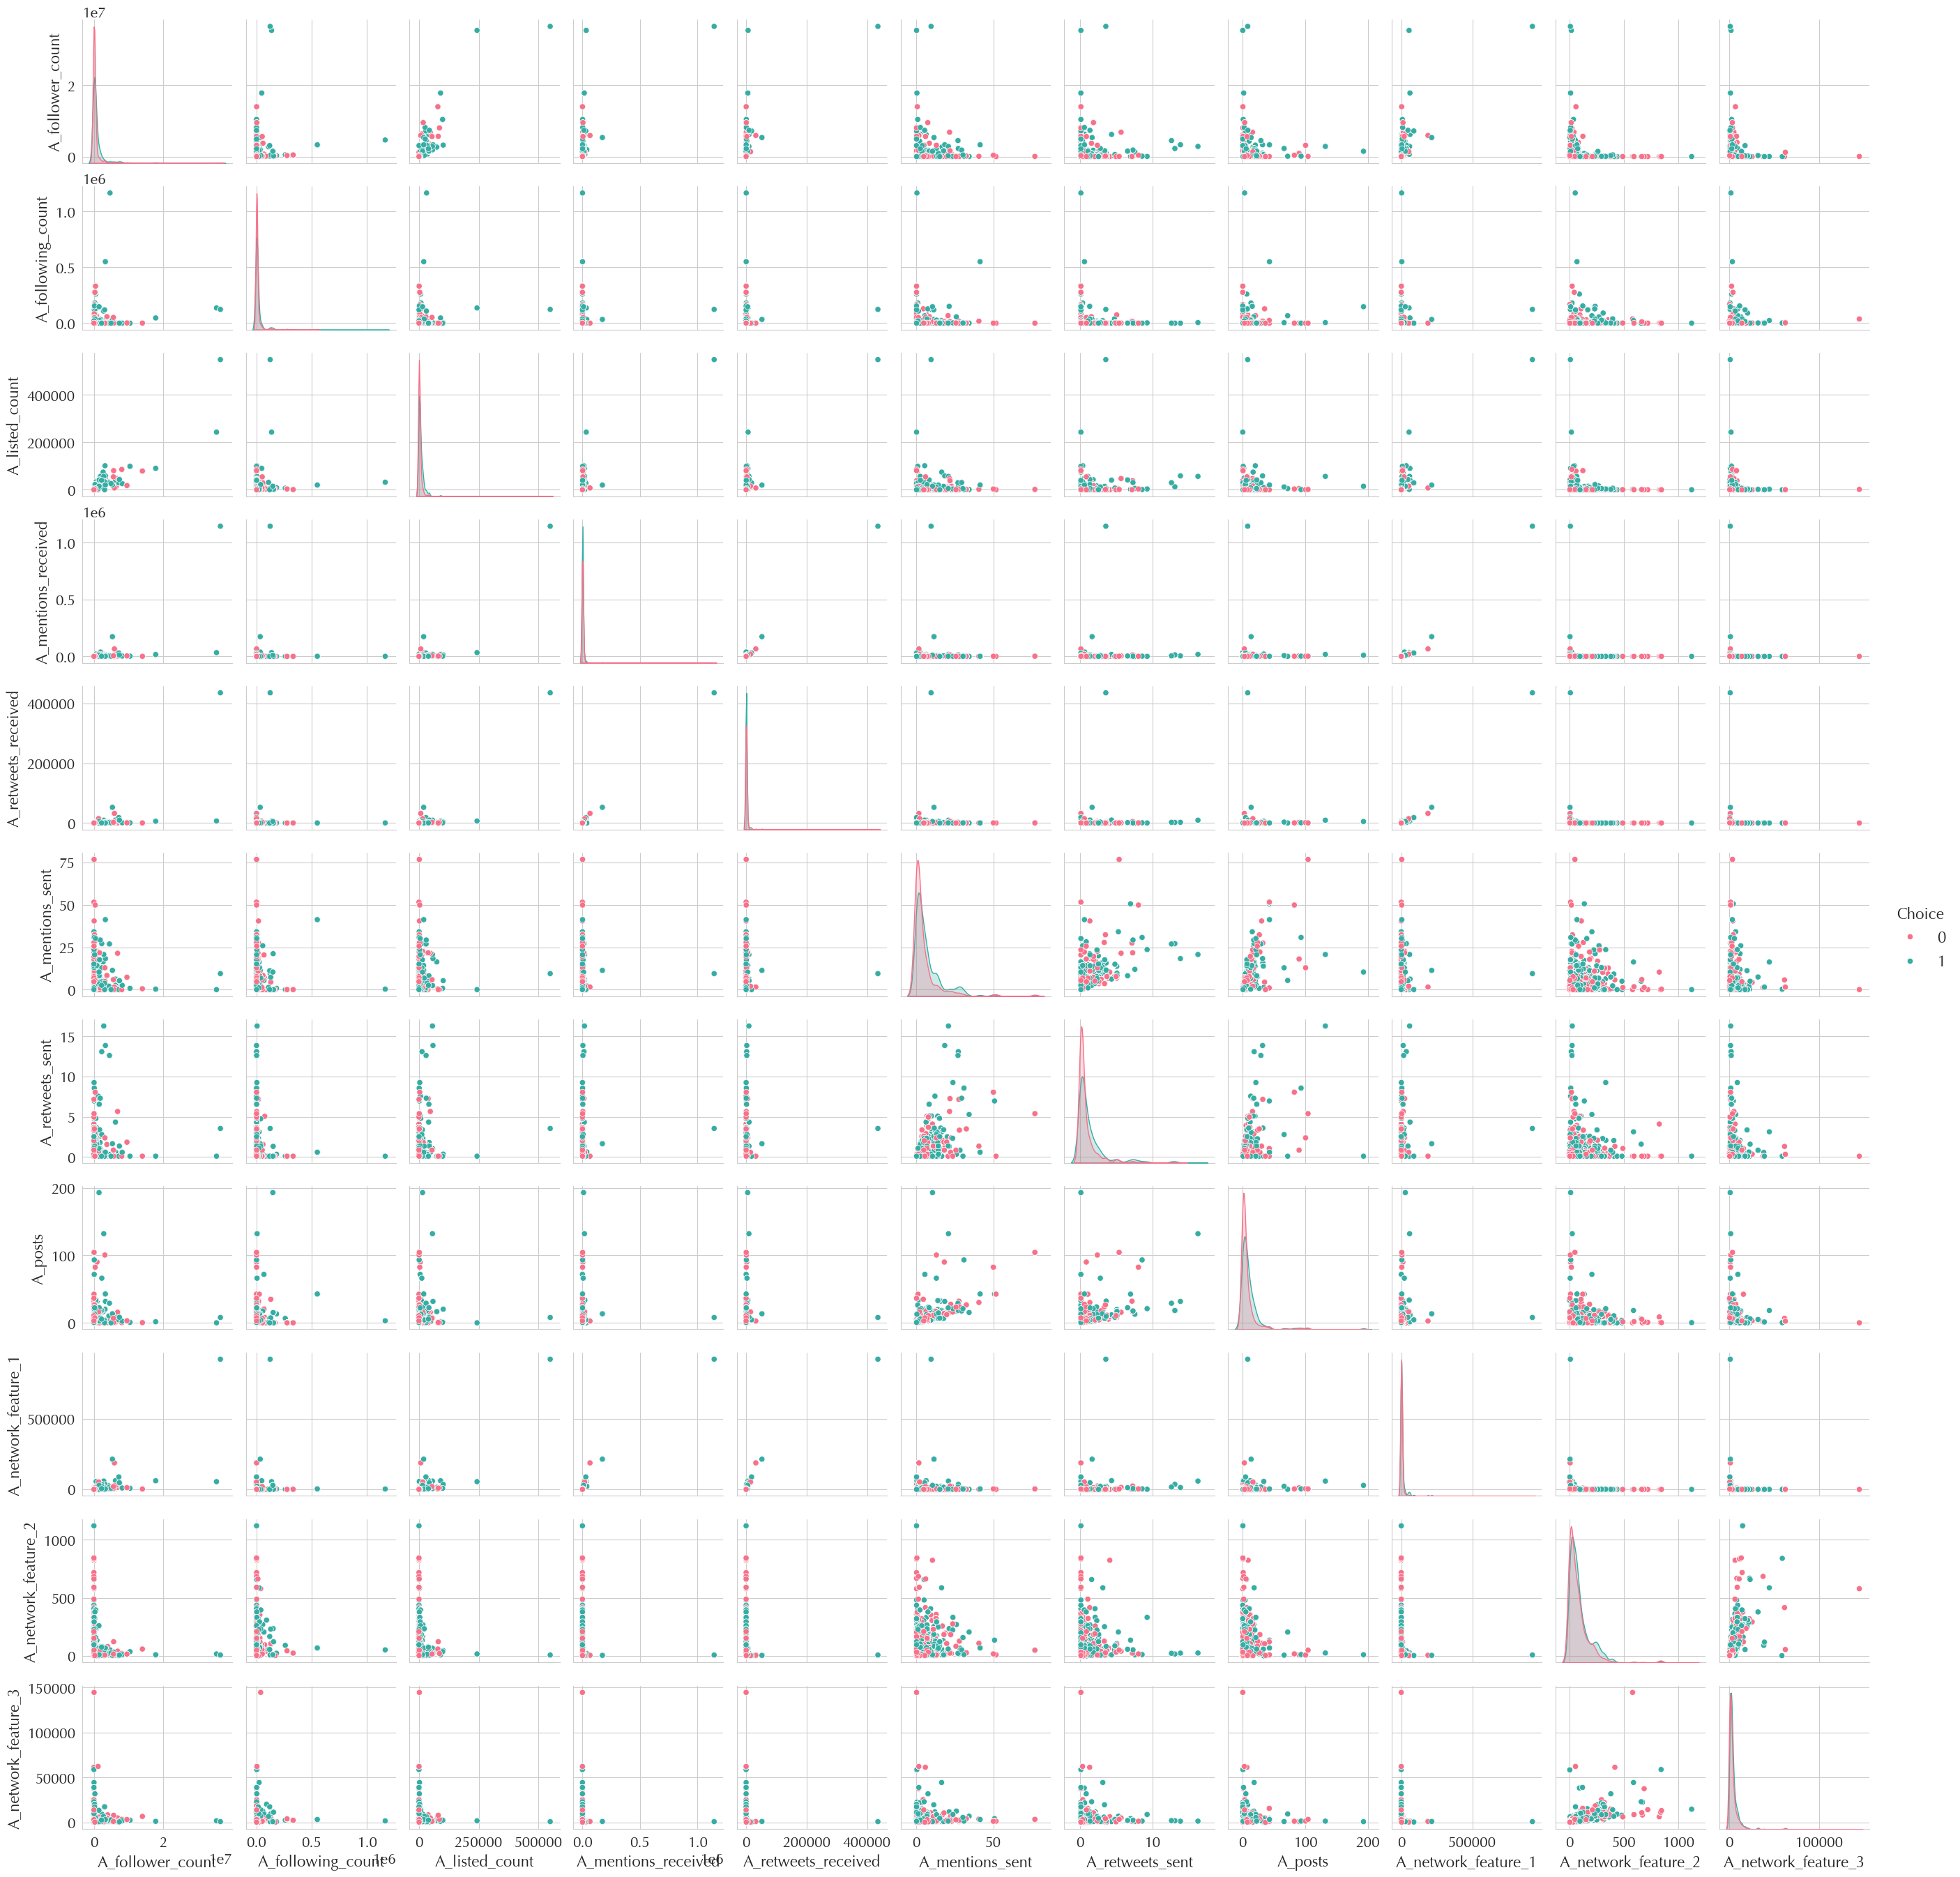

In [85]:
# Plot pair plot
sns.pairplot(df.iloc[:,:12], hue="Choice", palette="husl")

In [86]:
# Count the number of zeroes in each column
(df == 0).sum()

Choice                 2632
A_follower_count          0
A_following_count        34
A_listed_count           59
A_mentions_received       0
A_retweets_received       0
A_mentions_sent           0
A_retweets_sent           0
A_posts                   0
A_network_feature_1     203
A_network_feature_2     332
A_network_feature_3     251
B_follower_count          0
B_following_count        32
B_listed_count           45
B_mentions_received       0
B_retweets_received       0
B_mentions_sent           0
B_retweets_sent           0
B_posts                   0
B_network_feature_1     190
B_network_feature_2     331
B_network_feature_3     240
dtype: int64

## Transformation of features
Perhaps a transformation of (A / B) or (A – B) variables will be better than using A and B variables separately. This may also be easier to interpret

### A / B

In [87]:
ab_following_count = df['A_follower_count'] / df['B_follower_count']
ab_listed_count = df['A_listed_count'] / df['B_listed_count']
ab_mentions_received = df['A_mentions_received'] / df['B_mentions_received']
ab_retweets_received = df['A_retweets_received'] / df['B_retweets_received']
ab_mentions_sent = df['A_mentions_sent'] / df['B_mentions_sent']
ab_retweets_sent = df['A_retweets_sent'] / df['B_retweets_sent']
ab_posts = df['A_posts'] / df['B_posts']
ab_network_feature_1 = df['A_network_feature_1'] / df['B_network_feature_1']
ab_network_feature_2 = df['A_network_feature_2'] / df['B_network_feature_2']
ab_network_feature_3 = df['A_network_feature_3'] / df['B_network_feature_3']

### Correlations

In [88]:
divide_features = {
    'ab_following_count': ab_following_count, 
    'ab_listed_count': ab_listed_count, 
    'ab_mentions_received': ab_mentions_received,
    'ab_retweets_received': ab_retweets_received, 
    'ab_mentions_sent': ab_mentions_sent, 
    'ab_retweets_sent': ab_retweets_sent, 
    'ab_posts': ab_posts,
    'ab_network_feature_1': ab_network_feature_1, 
    'ab_network_feature_2': ab_network_feature_2, 
    'ab_network_feature_3': ab_network_feature_3
}

# Convert dictionary to DataFrame
divide_df = pd.DataFrame(divide_features)

# Calculate correlation matrix
divide_corr = divide_df.corr()

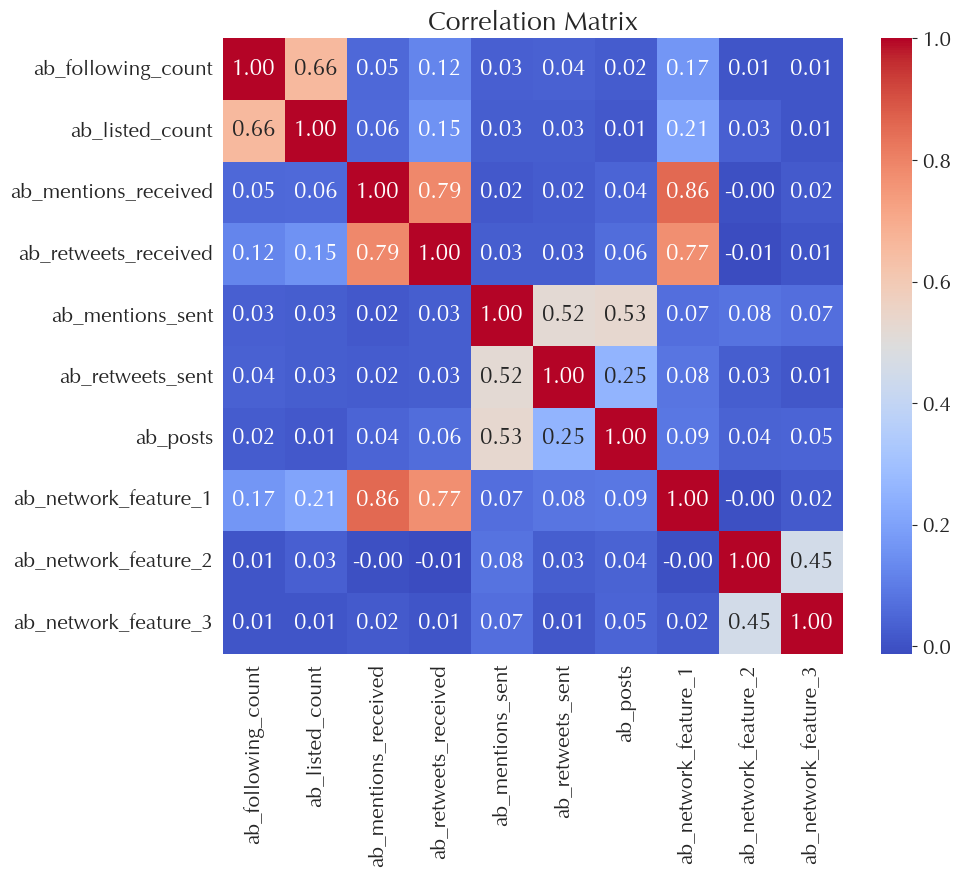

In [89]:
# Print correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(divide_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

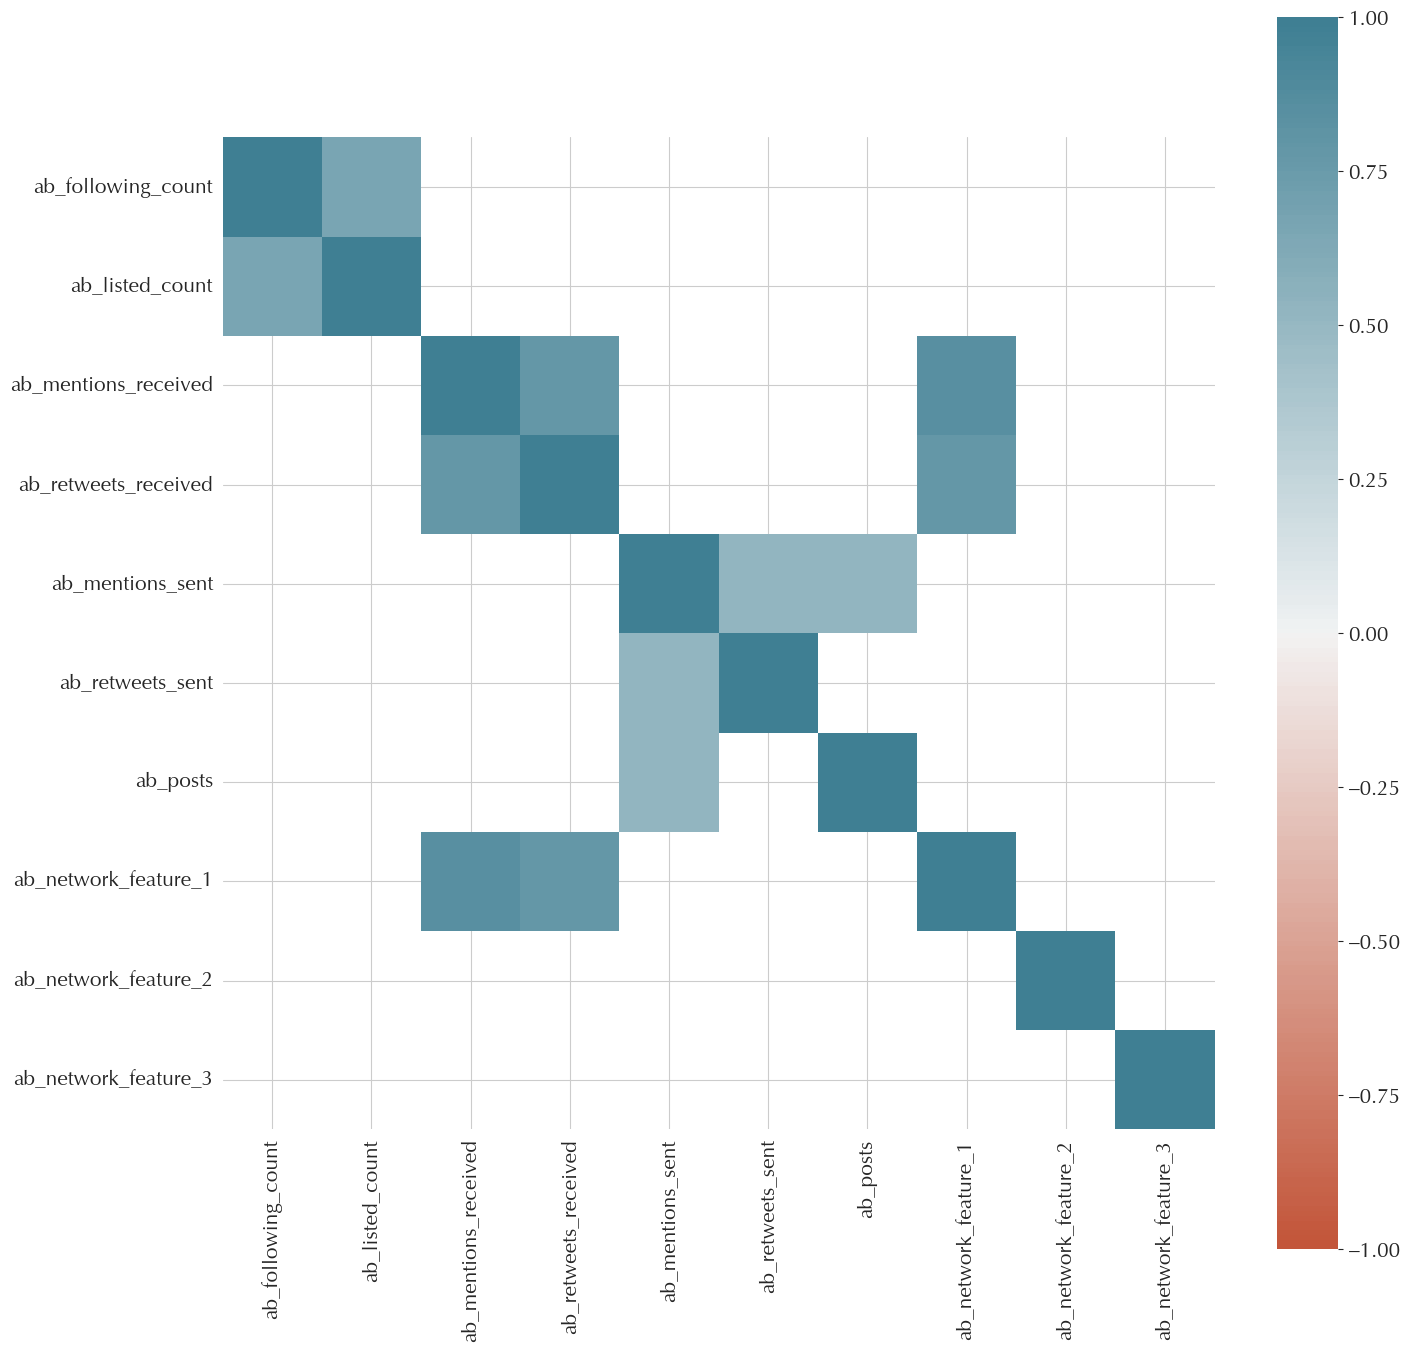

In [90]:
high_corr_divide = divide_corr[abs(divide_corr) > 0.5]
plt.figure(figsize=(16, 16))
ax = sns.heatmap(
    high_corr_divide,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [91]:
# Print the highly correlated pairs
high_corr_divide = high_corr_divide.unstack().sort_values()
high_corr_divide = high_corr_divide[high_corr_divide != 1]
high_corr_divide = high_corr_divide[abs(high_corr_divide) > 0.5]
print(high_corr_divide)

ab_mentions_sent      ab_retweets_sent        0.519548
ab_retweets_sent      ab_mentions_sent        0.519548
ab_mentions_sent      ab_posts                0.530188
ab_posts              ab_mentions_sent        0.530188
ab_following_count    ab_listed_count         0.657314
ab_listed_count       ab_following_count      0.657314
ab_network_feature_1  ab_retweets_received    0.773917
ab_retweets_received  ab_network_feature_1    0.773917
ab_mentions_received  ab_retweets_received    0.786722
ab_retweets_received  ab_mentions_received    0.786722
ab_mentions_received  ab_network_feature_1    0.856932
ab_network_feature_1  ab_mentions_received    0.856932
dtype: float64


In [92]:
# Keep only unique pairs
unique_high_corr_divide = high_corr_divide[::2]
print(unique_high_corr_divide)

ab_mentions_sent      ab_retweets_sent        0.519548
                      ab_posts                0.530188
ab_following_count    ab_listed_count         0.657314
ab_network_feature_1  ab_retweets_received    0.773917
ab_mentions_received  ab_retweets_received    0.786722
                      ab_network_feature_1    0.856932
dtype: float64


### VIF

In [93]:
def calculate_vif(data):
    # Handling or removing infinite values
    data = data.replace([np.inf, -np.inf], np.nan)
    
    # Dropping columns or rows with NaN values (choose one approach)
    # Approach 1: Drop any rows with NaN values
    # clean_data = data.dropna()
    
    # Approach 2: Fill NaN values with the mean (or median, zero, etc.)
    clean_data = data.fillna(data.mean())
    
    # Ensure we only process numeric data
    numeric_data = clean_data.select_dtypes(include=[np.number])
    
    # Initialize DataFrame to store VIF scores
    vif_data = pd.DataFrame()
    vif_data["feature"] = numeric_data.columns
    
    # Calculate VIF for each numeric feature
    vif_data["VIF"] = [variance_inflation_factor(numeric_data.values, i)
                       for i in range(len(numeric_data.columns))]
    return vif_data

In [94]:
vif_scores_divide = calculate_vif(divide_df)
print(vif_scores_divide)

                feature       VIF
0    ab_following_count  1.662760
1       ab_listed_count  1.700175
2  ab_mentions_received  3.188265
3  ab_retweets_received  4.328999
4      ab_mentions_sent  1.978813
5      ab_retweets_sent  1.503577
6              ab_posts  1.462424
7  ab_network_feature_1  1.753707
8  ab_network_feature_2  1.043787
9  ab_network_feature_3  1.033743


### A - B

In [95]:
a_b_following_count = df['A_follower_count'] - df['B_follower_count']
a_b_listed_count = df['A_listed_count'] - df['B_listed_count']
a_b_mentions_received = df['A_mentions_received'] - df['B_mentions_received']
a_b_retweets_received = df['A_retweets_received'] - df['B_retweets_received']
a_b_mentions_sent = df['A_mentions_sent'] - df['B_mentions_sent']
a_b_retweets_sent = df['A_retweets_sent'] - df['B_retweets_sent']
a_b_posts = df['A_posts'] - df['B_posts']
a_b_network_feature_1 = df['A_network_feature_1'] - df['B_network_feature_1']
a_b_network_feature_2 = df['A_network_feature_2'] - df['B_network_feature_2']
a_b_network_feature_3 = df['A_network_feature_3'] - df['B_network_feature_3']

### Correlations

In [96]:
minus_features = {
    'a_b_following_count': a_b_following_count, 
    'a_b_listed_count': ab_listed_count, 
    'a_b_mentions_received': a_b_mentions_received,
    'a_b_retweets_received': a_b_retweets_received, 
    'a_b_mentions_sent': a_b_mentions_sent, 
    'a_b_retweets_sent': a_b_retweets_sent, 
    'a_b_posts': a_b_posts,
    'a_b_network_feature_1': a_b_network_feature_1, 
    'a_b_network_feature_2': a_b_network_feature_2, 
    'a_b_network_feature_3': a_b_network_feature_3
}

# Convert dictionary to DataFrame
minus_df = pd.DataFrame(minus_features)

# Calculate correlations
minus_corr = minus_df.corr()

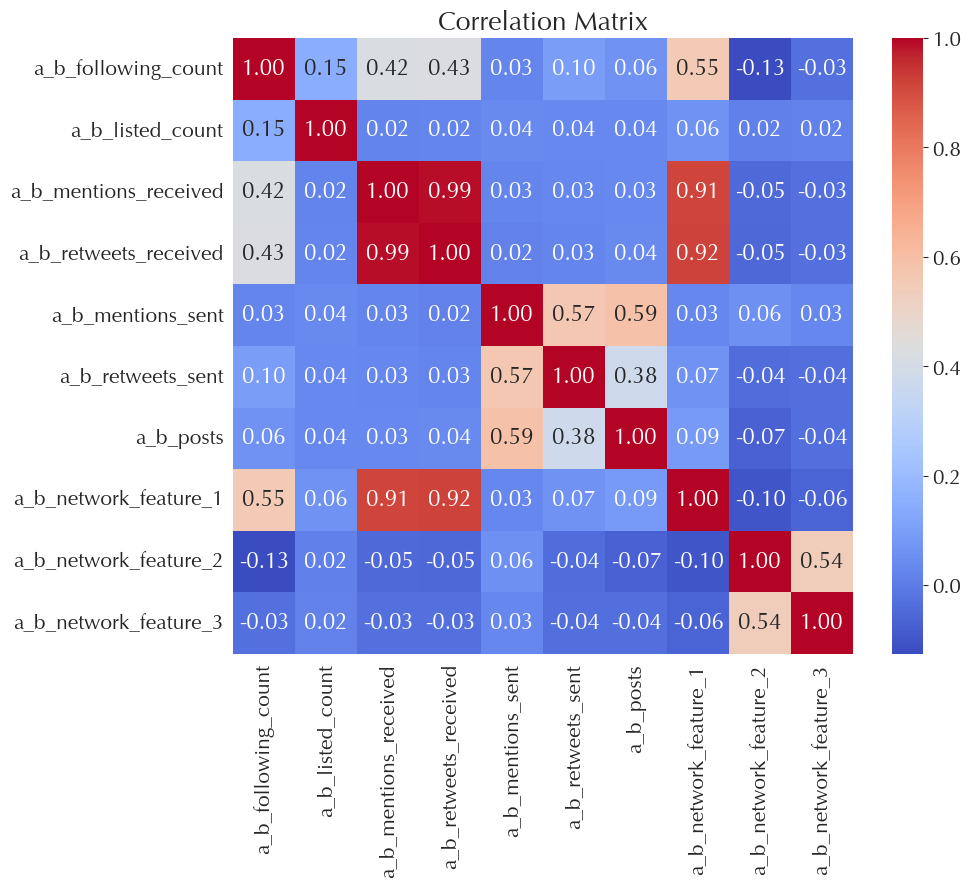

In [97]:
# Print correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(minus_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

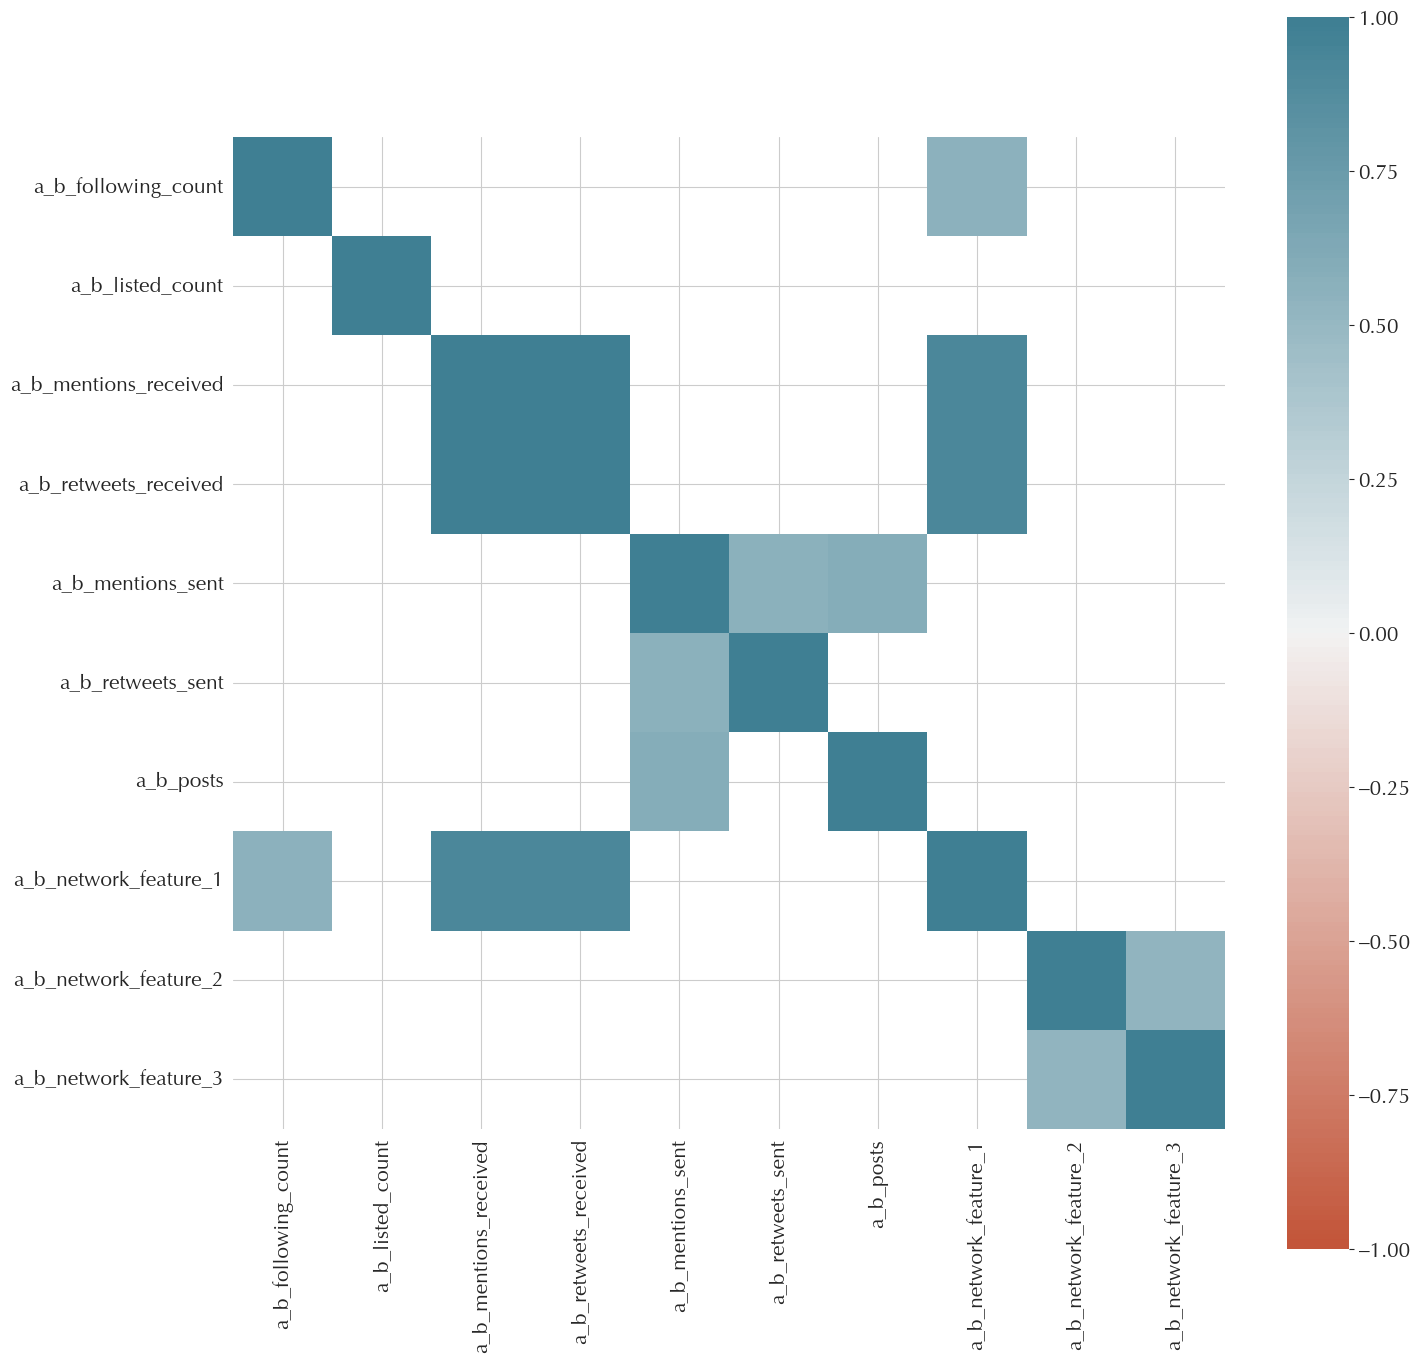

In [98]:
high_corr_minus = minus_corr[abs(minus_corr) > 0.5]
plt.figure(figsize=(16, 16))
ax = sns.heatmap(
    high_corr_minus,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [99]:
# Print the highly correlated pairs
high_corr_minus = high_corr_minus.unstack().sort_values()
high_corr_minus = high_corr_minus[high_corr_minus != 1]
high_corr_minus = high_corr_minus[abs(high_corr_minus) > 0.5]
print(high_corr_minus)

a_b_network_feature_2  a_b_network_feature_3    0.535223
a_b_network_feature_3  a_b_network_feature_2    0.535223
a_b_following_count    a_b_network_feature_1    0.554175
a_b_network_feature_1  a_b_following_count      0.554175
a_b_mentions_sent      a_b_retweets_sent        0.568475
a_b_retweets_sent      a_b_mentions_sent        0.568475
a_b_mentions_sent      a_b_posts                0.589821
a_b_posts              a_b_mentions_sent        0.589821
a_b_mentions_received  a_b_network_feature_1    0.914955
a_b_network_feature_1  a_b_mentions_received    0.914955
a_b_retweets_received  a_b_network_feature_1    0.920833
a_b_network_feature_1  a_b_retweets_received    0.920833
a_b_mentions_received  a_b_retweets_received    0.988450
a_b_retweets_received  a_b_mentions_received    0.988450
dtype: float64


In [100]:
# Keep only unique pairs
unique_high_corr_minus = high_corr_minus[::2]
print(unique_high_corr_minus)

a_b_network_feature_2  a_b_network_feature_3    0.535223
a_b_following_count    a_b_network_feature_1    0.554175
a_b_mentions_sent      a_b_retweets_sent        0.568475
                       a_b_posts                0.589821
a_b_mentions_received  a_b_network_feature_1    0.914955
a_b_retweets_received  a_b_network_feature_1    0.920833
a_b_mentions_received  a_b_retweets_received    0.988450
dtype: float64


### VIF

In [101]:
vif_scores_minus = calculate_vif(minus_df)
print(vif_scores_minus)

                 feature        VIF
0    a_b_following_count   1.588822
1       a_b_listed_count   1.028015
2  a_b_mentions_received  44.390832
3  a_b_retweets_received  47.312703
4      a_b_mentions_sent   2.016135
5      a_b_retweets_sent   1.512885
6              a_b_posts   1.597633
7  a_b_network_feature_1   8.615680
8  a_b_network_feature_2   1.452227
9  a_b_network_feature_3   1.408255


High VIF values suggest that the model's predictive power and interpretability could be compromised by multicollinearity. VIF scores for a_b_mentions_received, a_b_retweets_received and a_b_network_feature_1 indicate that these are highly linearly related to one or more of the other variables in the model. 

Decision to proceed with A - B since A / B had inf values due to 0 values. We will proceed by removing a_b_mentions_received and re-testing the VIF.

In [102]:
# Remove a_b_mentions_received
minus_df_test1 = minus_df.drop(columns=['a_b_mentions_received'])

# Recalculate VIF scores
vif_scores_minus_test1 = calculate_vif(minus_df_test1)

# Print VIF scores
print(vif_scores_minus_test1)

                 feature       VIF
0    a_b_following_count  1.583727
1       a_b_listed_count  1.027849
2  a_b_retweets_received  7.200981
3      a_b_mentions_sent  2.006476
4      a_b_retweets_sent  1.512699
5              a_b_posts  1.585906
6  a_b_network_feature_1  8.519533
7  a_b_network_feature_2  1.452207
8  a_b_network_feature_3  1.408249


In [103]:
# Remove a_b_mentions_received
minus_df_test2 = minus_df.drop(columns=['a_b_mentions_received', 'a_b_network_feature_1'])

# Recalculate VIF scores
vif_scores_minus_test2 = calculate_vif(minus_df_test2)

# Print VIF scores
print(vif_scores_minus_test2)

                 feature       VIF
0    a_b_following_count  1.286646
1       a_b_listed_count  1.027021
2  a_b_retweets_received  1.229290
3      a_b_mentions_sent  1.998452
4      a_b_retweets_sent  1.506544
5              a_b_posts  1.566987
6  a_b_network_feature_2  1.449578
7  a_b_network_feature_3  1.405959


# Previous Code

## Count of columns with specific data types

Text(0, 0.5, 'Data type')

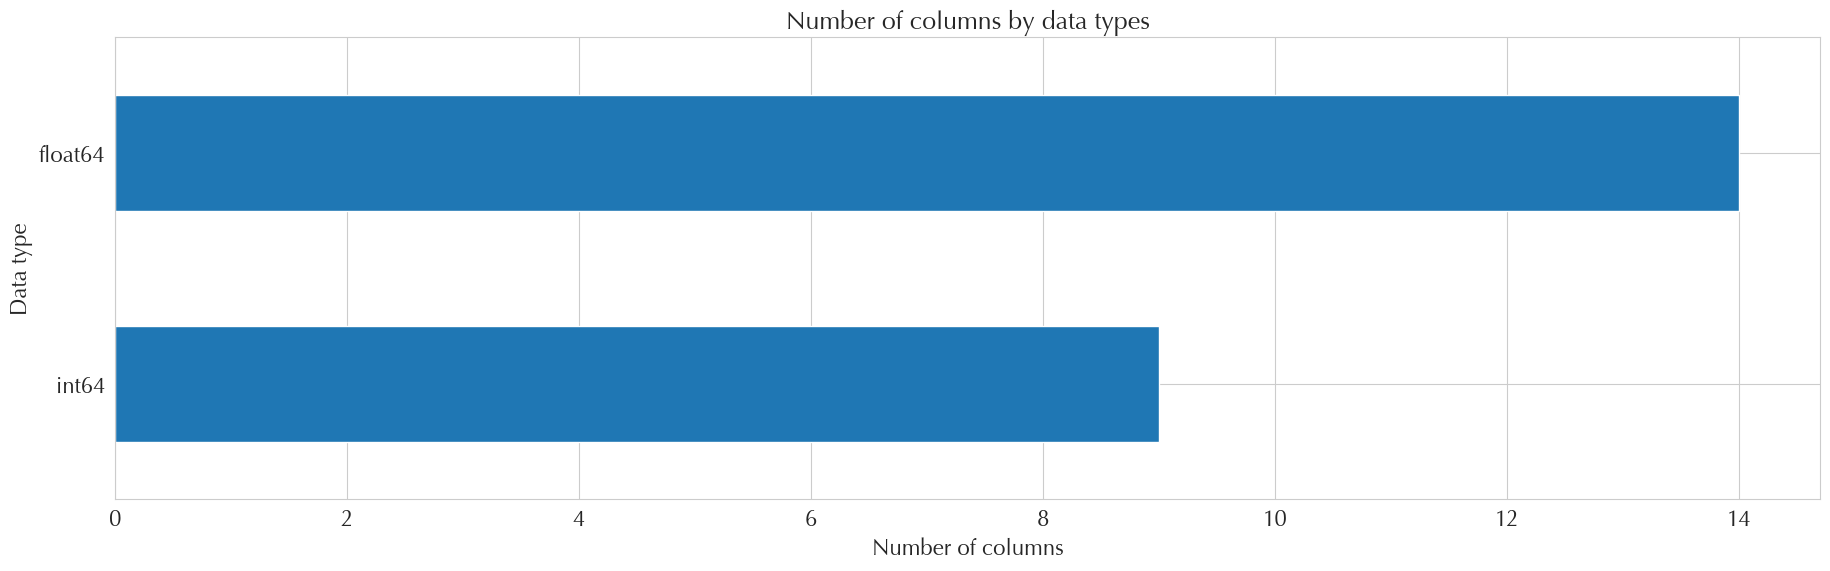

In [104]:
# Number of each type of column
df.dtypes.value_counts().sort_values().plot(kind='barh',
                                            figsize=(22, 6),
                                            fontsize=16)

plt.title('Number of columns by data types', fontsize=18)
plt.xlabel('Number of columns', fontsize=16)
plt.ylabel('Data type', fontsize=16)

## Data Clean up
Drop the fetures that are not usefull for the model.

### Clean column names

In [105]:
def clean_col(name):
    return (
        name.strip().lower().replace(" ", "_")
    )

In [106]:
df.rename(columns=clean_col) # or jn.clean_names(df)
df.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,A_network_feature_3,B_follower_count,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,166.500000,11355.000000,34463,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,18.442971,1330.366048,39262,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,68.927835,5999.896907,3622,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,2.000000,96.166667,19562,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,127.404293,2833.847943,7554,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


# Part II

Subreddits: https://the-eye.eu/redarcs/ \
CanadaCoronavirus: https://old.reddit.com/r/CanadaCoronavirus/

In [107]:
filepath = 'CanadaCoronavirus_comments.zst'
df_submission=pd.read_json(filepath,compression=dict(method='zstd',
max_window_size=2147483648), lines=True)
df_submission.head()

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,author_flair_text,author_flair_text_color,author_fullname,awarders,body,can_gild,can_mod_post,collapsed,collapsed_because_crowd_control,collapsed_reason,controversiality,created_utc,distinguished,edited,gilded,gildings,id,is_submitter,link_id,locked,no_follow,parent_id,permalink,quarantined,removal_reason,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,total_awards_received,treatment_tags,author_flair_richtext,author_flair_type,author_patreon_flair,author_premium,top_awarded_type,author_cakeday,comment_type,archived,collapsed_reason_code,name,retrieved_utc,score_hidden,author_is_blocked,unrepliable_reason
0,[],NaN,[deleted],NaN,,NaN,None,None,dark,None,[],[removed],True,0.0,True,NaN,None,0,1583071952,None,1583076627,0,{},fj6hdjo,False,t3_fbu52u,False,True,t3_fbu52u,/r/CanadaCoronavirus/comments/fbu52u/welcome_t...,0.0,NaN,1.590954e+09,4,True,False,CanadaCoronavirus,t5_2gpd6g,r/CanadaCoronavirus,public,0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],NaN,[deleted],NaN,,NaN,None,None,dark,None,[],[removed],True,0.0,True,NaN,None,0,1583072449,None,0,0,{},fj6i1dc,False,t3_fbu52u,False,True,t3_fbu52u,/r/CanadaCoronavirus/comments/fbu52u/welcome_t...,0.0,NaN,1.590954e+09,0,True,False,CanadaCoronavirus,t5_2gpd6g,r/CanadaCoronavirus,public,0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],NaN,AlienOne13,1.414196e+09,None,NaN,None,None,None,t2_j18ia,[],"this is the problem, people panic and create c...",True,0.0,False,NaN,None,0,1583072899,None,0,0,{},fj6iniy,False,t3_fbun4o,False,False,t3_fbun4o,/r/CanadaCoronavirus/comments/fbun4o/covid19_f...,0.0,NaN,1.590955e+09,4,True,False,CanadaCoronavirus,t5_2gpd6g,r/CanadaCoronavirus,public,0,[],[],text,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],NaN,Jenksz,1.315193e+09,None,NaN,None,None,None,t2_5sjxu,[],Agreed. A lot of people latch on to how other ...,True,0.0,False,NaN,None,0,1583072991,None,0,0,{},fj6irxf,True,t3_fbun4o,False,True,t1_fj6iniy,/r/CanadaCoronavirus/comments/fbun4o/covid19_f...,0.0,NaN,1.590955e+09,3,True,False,CanadaCoronavirus,t5_2gpd6g,r/CanadaCoronavirus,public,0,[],[],text,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],NaN,lordbnor,1.519758e+09,None,NaN,None,None,None,t2_z3ch6gc,[],If you’re not first you’re last...\n\n-Ricky B...,True,0.0,False,NaN,None,0,1583073204,None,0,0,{},fj6j38u,False,t3_fbun4o,False,False,t1_fj6irxf,/r/CanadaCoronavirus/comments/fbun4o/covid19_f...,0.0,NaN,1.590955e+09,6,True,False,CanadaCoronavirus,t5_2gpd6g,r/CanadaCoronavirus,public,0,[],[],text,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
filepath = 'CanadaCoronavirus_comments.zst'
df_comments = pd.read_json(filepath,compression=dict(method='zstd',
max_window_size=2147483648), lines=True)
df_comments.head()

,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,author_flair_text,author_flair_text_color,author_fullname,awarders,body,can_gild,can_mod_post,collapsed,collapsed_because_crowd_control,collapsed_reason,controversiality,created_utc,distinguished,edited,gilded,gildings,id,is_submitter,link_id,locked,no_follow,parent_id,permalink,quarantined,removal_reason,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,total_awards_received,treatment_tags,author_flair_richtext,author_flair_type,author_patreon_flair,author_premium,top_awarded_type,author_cakeday,comment_type,archived,collapsed_reason_code,name,retrieved_utc,score_hidden,author_is_blocked,unrepliable_reason
0,[],NaN,[deleted],NaN,,NaN,None,None,dark,None,[],[removed],True,0.0,True,NaN,None,0,1583071952,None,1583076627,0,{},fj6hdjo,False,t3_fbu52u,False,True,t3_fbu52u,/r/CanadaCoronavirus/comments/fbu52u/welcome_t...,0.0,NaN,1.590954e+09,4,True,False,CanadaCoronavirus,t5_2gpd6g,r/CanadaCoronavirus,public,0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],NaN,[deleted],NaN,,NaN,None,None,dark,None,[],[removed],True,0.0,True,NaN,None,0,1583072449,None,0,0,{},fj6i1dc,False,t3_fbu52u,False,True,t3_fbu52u,/r/CanadaCoronavirus/comments/fbu52u/welcome_t...,0.0,NaN,1.590954e+09,0,True,False,CanadaCoronavirus,t5_2gpd6g,r/CanadaCoronavirus,public,0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],NaN,AlienOne13,1.414196e+09,None,NaN,None,None,None,t2_j18ia,[],"this is the problem, people panic and create c...",True,0.0,False,NaN,None,0,1583072899,None,0,0,{},fj6iniy,False,t3_fbun4o,False,False,t3_fbun4o,/r/CanadaCoronavirus/comments/fbun4o/covid19_f...,0.0,NaN,1.590955e+09,4,True,False,CanadaCoronavirus,t5_2gpd6g,r/CanadaCoronavirus,public,0,[],[],text,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],NaN,Jenksz,1.315193e+09,None,NaN,None,None,None,t2_5sjxu,[],Agreed. A lot of people latch on to how other ...,True,0.0,False,NaN,None,0,1583072991,None,0,0,{},fj6irxf,True,t3_fbun4o,False,True,t1_fj6iniy,/r/CanadaCoronavirus/comments/fbun4o/covid19_f...,0.0,NaN,1.590955e+09,3,True,False,CanadaCoronavirus,t5_2gpd6g,r/CanadaCoronavirus,public,0,[],[],text,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],NaN,lordbnor,1.519758e+09,None,NaN,None,None,None,t2_z3ch6gc,[],If you’re not first you’re last...\n\n-Ricky B...,True,0.0,False,NaN,None,0,1583073204,None,0,0,{},fj6j38u,False,t3_fbun4o,False,False,t1_fj6irxf,/r/CanadaCoronavirus/comments/fbun4o/covid19_f...,0.0,NaN,1.590955e+09,6,True,False,CanadaCoronavirus,t5_2gpd6g,r/CanadaCoronavirus,public,0,[],[],text,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
